In [2]:
import pandas as pd 
import numpy as np
data = pd.read_csv('/Users/hongmingfu/Downloads/hepatitis/hepatitis.data',
names =  ["class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", 
          "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology"],
        na_values={'?'})

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [2]:
data.isnull().sum()

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

In [2]:
dummy_variables = ["steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices","histology"]
continuous_variables = ["age","bilirubin", "alk_phosphate", "sgot", "albumin", "protime"]

for column in dummy_variables: 
    data[column] = data[column].map({1:False, 2: True,1.0:False,2.0:True})
data['sex'] = data['sex'].map({2:'Male',1:'Female'})
data


,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,Male,False,True,True,True,True,False,True,True,True,True,True,1.0,85.0,18.0,4.0,NaN,False
1,2,50,Female,False,True,False,True,True,False,True,True,True,True,True,0.9,135.0,42.0,3.5,NaN,False
2,2,78,Female,True,True,False,True,True,True,True,True,True,True,True,0.7,96.0,32.0,4.0,NaN,False
3,2,31,Female,NaN,False,True,True,True,True,True,True,True,True,True,0.7,46.0,52.0,4.0,80.0,False
4,2,34,Female,True,True,True,True,True,True,True,True,True,True,True,1.0,NaN,200.0,4.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,Female,True,True,False,False,False,True,True,True,False,False,False,7.6,NaN,242.0,3.3,50.0,True
151,2,44,Female,True,True,False,True,True,True,False,True,True,True,True,0.9,126.0,142.0,4.3,NaN,True
152,2,61,Female,False,True,False,False,True,False,False,True,False,True,True,0.8,75.0,20.0,4.1,NaN,True
153,2,53,Male,False,True,False,True,True,True,True,False,False,True,False,1.5,81.0,19.0,4.1,48.0,True


In [6]:
data[continuous_variables].corr()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
age,1.000000,0.125463,0.008924,0.082545,-0.262981,-0.222233
bilirubin,0.125463,1.000000,0.220062,0.232967,-0.377318,-0.302608
alk_phosphate,0.008924,0.220062,1.000000,0.239581,-0.403857,-0.226846
sgot,0.082545,0.232967,0.239581,1.000000,-0.136276,-0.189149
albumin,-0.262981,-0.377318,-0.403857,-0.136276,1.000000,0.424419
protime,-0.222233,-0.302608,-0.226846,-0.189149,0.424419,1.000000


In [10]:
data['albumin'] = pd.to_numeric(data['albumin'])

In [11]:
data['sex'].value_counts()

sex
Female    139
Male       16
Name: count, dtype: int64

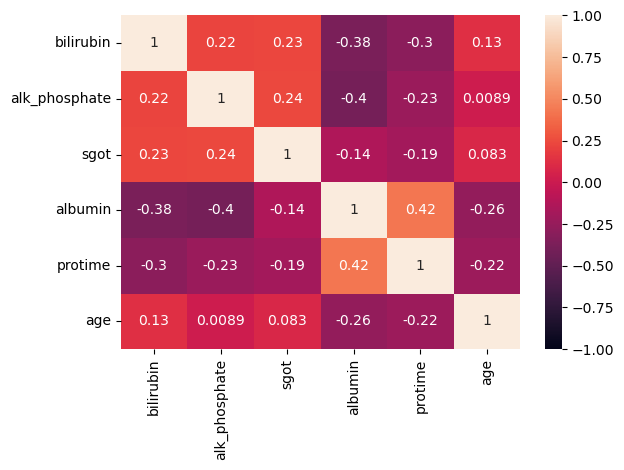

In [510]:
import seaborn as sns
import matplotlib.pyplot as plt
temp = []
for ele in continuous_variables: 
    temp.append(ele)
temp.append("age")
sns.heatmap(data[temp].corr(),vmin = -1, vmax = 1,annot = True)
plt.tight_layout()
plt.savefig('heatmap', dpi=350)
plt.show()

In [ ]:
continuous_variables

In [11]:
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,Male,False,True,True,True,True,False,True,True,True,True,True,1.0,85.0,18.0,4.0,NaN,False
1,2,50,Female,False,True,False,True,True,False,True,True,True,True,True,0.9,135.0,42.0,3.5,NaN,False
2,2,78,Female,True,True,False,True,True,True,True,True,True,True,True,0.7,96.0,32.0,4.0,NaN,False
3,2,31,Female,NaN,False,True,True,True,True,True,True,True,True,True,0.7,46.0,52.0,4.0,80.0,False
4,2,34,Female,True,True,True,True,True,True,True,True,True,True,True,1.0,NaN,200.0,4.0,NaN,False


In [2]:
data = pd.read_csv('/Users/hongmingfu/Downloads/hepatitis/hepatitis.data',
names =  ["class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", 
          "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology"],
        na_values={'?'})
data['class'] = data['class'].map({2:'Survival',1:'Terminal'})
data

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,Survival,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,Survival,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,Survival,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,Survival,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,Survival,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Terminal,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,Survival,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,Survival,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,Survival,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


[Text(0.5, 0, 'count of patients'), Text(0, 0.5, 'class of patients')]

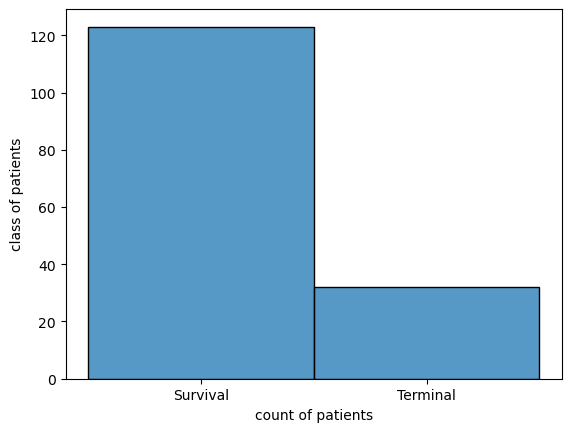

In [14]:
ax = sns.histplot(data = data['class'],binwidth = 3 )
ax.set(xlabel='count of patients', ylabel='class of patients')

In [15]:
data['class'].value_counts()/data['class'].shape[0]

class
Survival    0.793548
Terminal    0.206452
Name: count, dtype: float64

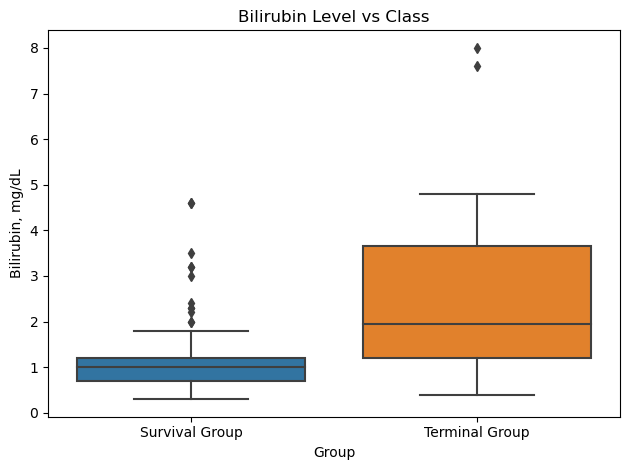

In [516]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the data to avoid modifying the original DataFrame
data_modified = data.copy()

# Map class values to group names
class_mapping = {1: 'Terminal Group', 2: 'Survival Group'}
data_modified['class'] = data_modified['class'].map(class_mapping)

# Create the boxplot
graph = sns.boxplot(data=data_modified, x='class', y='bilirubin')

# Set the title and labels
graph.set_title('Bilirubin Level vs Class')
graph.set(xlabel='Group', ylabel='Bilirubin, mg/dL')

# Adjust layout
plt.tight_layout()

# Save and show the plot
plt.savefig('bilirubin_level_with_groups.png', dpi=350)
plt.show()





In [19]:
import scipy.stats as stats
x = np.array(data.loc[data['class'] == 'Negative']['bilirubin'])
x = x[~np.isnan(x)]


y = np.array(data.loc[data['class'] == 'Positive']['bilirubin'])
y = y[~np.isnan(y)]

stats.ttest_ind(a=x, b=y, equal_var=True)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [20]:
data.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

Text(0.5, 1.0, 'protime distribution among patients')

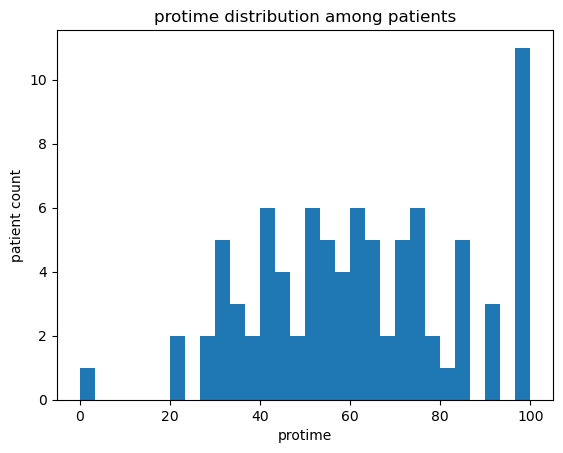

In [27]:
plt.hist(data['protime'],bins = 30)
plt.xlabel('protime')
plt.ylabel('patient count')
plt.title('protime distribution among patients')

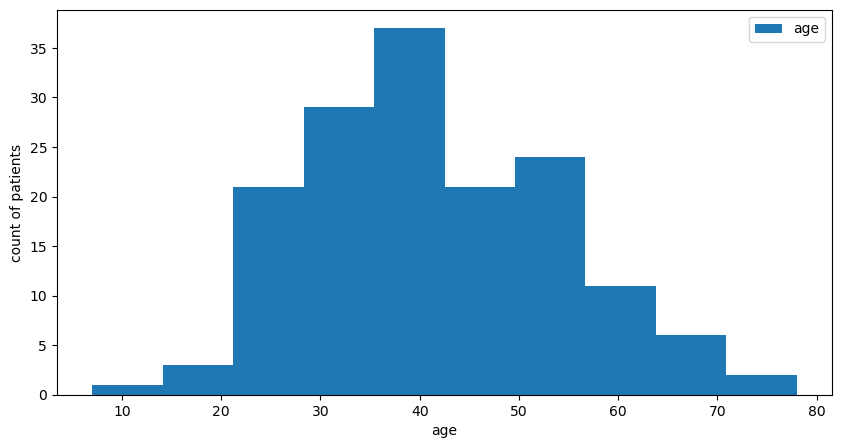

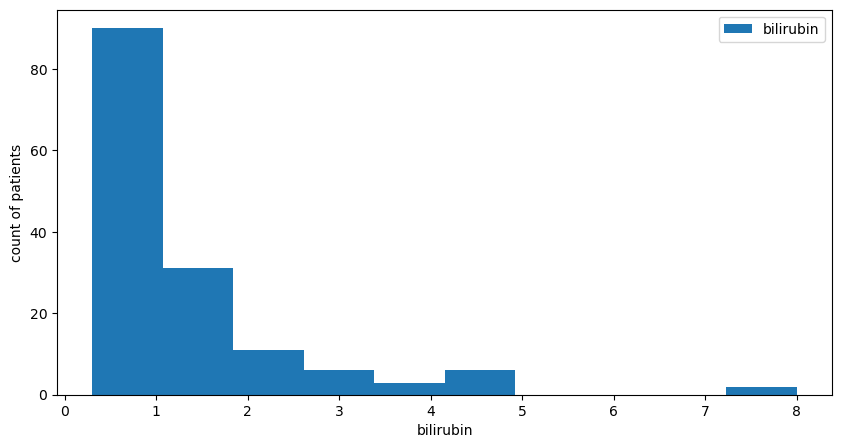

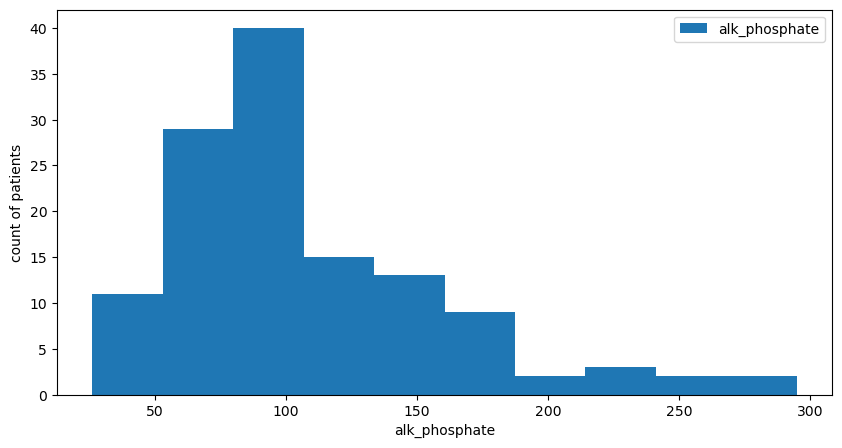

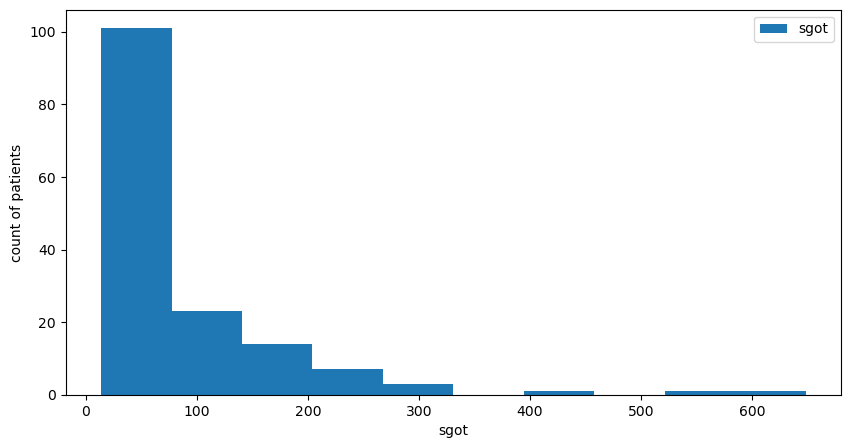

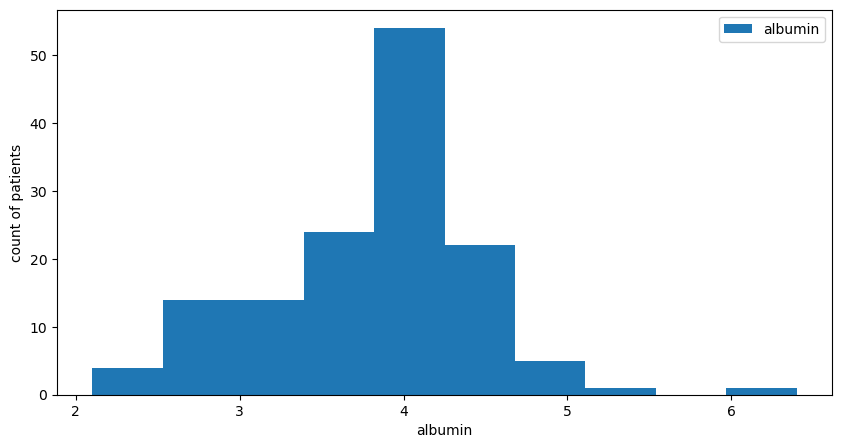

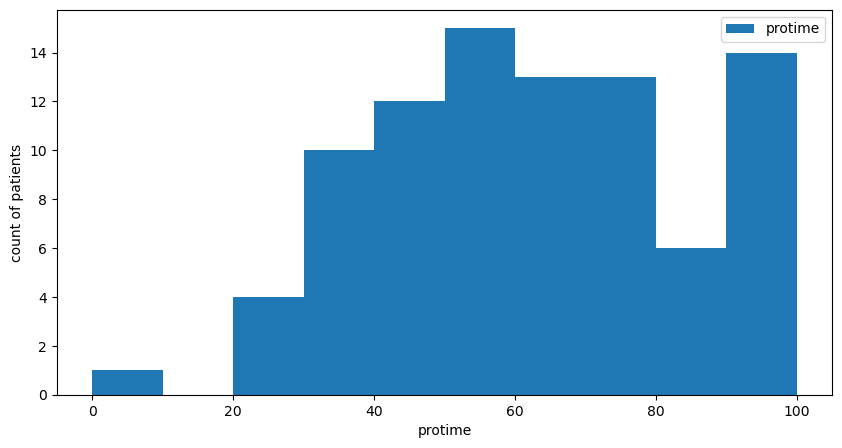

In [28]:
# use minmax for age and 
from pandas import Series
for column in num_ftrs: 
    ts = pd.DataFrame(data[column])
    
    ax = ts.plot(kind = 'hist',figsize = (10,5),title = (''))
    ax.set_xlabel(column)
    ax.set_ylabel('count of patients')
    plt.show()
    

In [3]:
data

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,Survival,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,Survival,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,Survival,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,Survival,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,Survival,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Terminal,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,Survival,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,Survival,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,Survival,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [372]:
df = pd.DataFrame(data)

# Calculate the percentage of missing values
# missing_percentage = df.isnull().mean() * 100

# # Plotting
# plt.figure(figsize=(10, 6))
# missing_percentage.plot(kind='bar')
# plt.title('Percentage of Missing Values')
# plt.ylabel('Percentage')
# plt.xlabel('Columns')
# plt.show()
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [369]:
categorical_variables = ["steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices","histology"]
for col in categorical_variables: 
    df[col] = df[col].map({True:1,False:0})
df['sex'] = df['sex'].map({'Male':1,'Female':0})

In [370]:
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,85.0,18.0,4.0,NaN,NaN
1,2,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,135.0,42.0,3.5,NaN,NaN
2,2,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,96.0,32.0,4.0,NaN,NaN
3,2,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,46.0,52.0,4.0,80.0,NaN
4,2,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,200.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,NaN,242.0,3.3,50.0,NaN
151,2,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,126.0,142.0,4.3,NaN,NaN
152,2,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,75.0,20.0,4.1,NaN,NaN
153,2,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,81.0,19.0,4.1,48.0,NaN


In [366]:

# I have dropped the categorical variable with na values in it first since my datapoint will be i.i.d. 
y_full = df['class'] 
y_full = y_full.map({2:0,1:1})
y_full

0      0
1      0
2      0
3      0
4      0
      ..
150    1
151    0
152    0
153    0
154    1
Name: class, Length: 155, dtype: int64

In [6]:
categorical_variables = ["sex","steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices","histology"]
continuous_variables = ["bilirubin", "alk_phosphate", "sgot", "albumin", "protime"]
min_max_variable = ['age']

In [370]:
most_frequent = np.bincount(mapped_y).argmax()
baseline_accuracy = np.mean(y_test == most_frequent)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.7097


In [44]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier




In [124]:
df = pd.read_csv('/Users/hongmingfu/Downloads/hepatitis/hepatitis.data',
names =  ["class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", 
          "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology"],
        na_values={'?'})# drop the ID

In [28]:
df['class'] = df['class'].map({2:'Survival',1:'Terminal'})
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,Survival,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,Survival,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,Survival,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,Survival,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,Survival,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Terminal,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,Survival,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,Survival,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,Survival,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


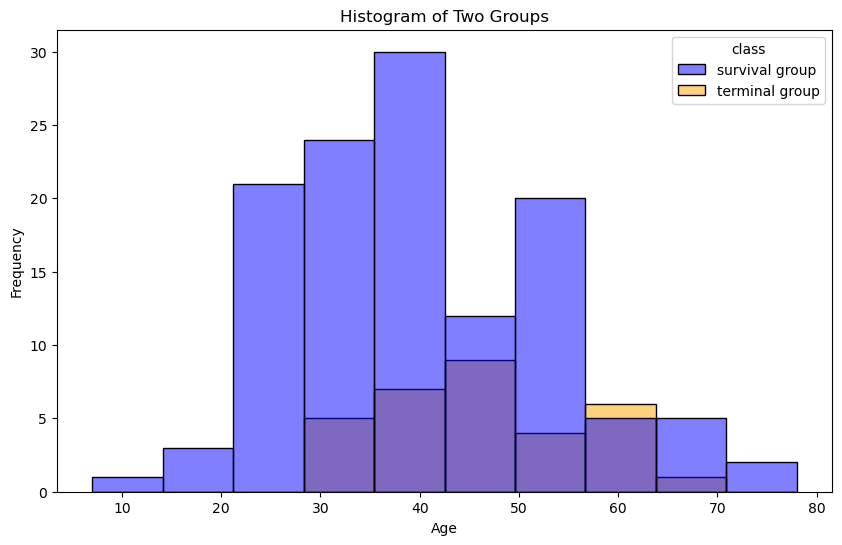

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the DataFrame to avoid modifying the original data
df_plot = df.copy()

# Replace the class values with custom labels
df_plot['class'] = df_plot['class'].replace({1: 'terminal group', 2: 'survival group'})

plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(data=df_plot, x='age', hue='class', bins=10, kde=False, palette=['blue', 'orange'])

plt.title('Histogram of Two Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('page4.png', dpi=300)
plt.show()



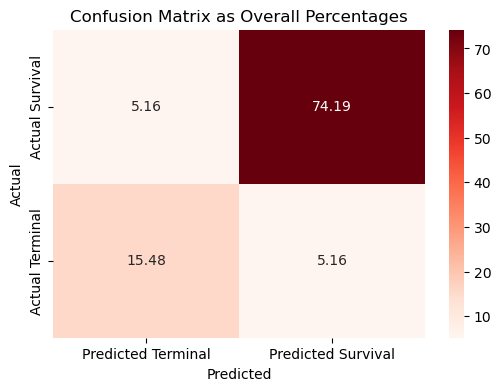

In [214]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a trained model and test data
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_full, best_xgb_model.predict(df_total))

# Convert to DataFrame
cm_df = pd.DataFrame(cm, index=["Actual Survival","Actual Terminal"], 
                     columns=["Predicted Terminal", "Predicted Survival"])

# Convert raw counts to overall percentages
cm_df_percent = cm_df / cm_df.sum().sum() * 100

# Plotting using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_df_percent, annot=True, fmt='.2f', cmap='Reds')
plt.title('Confusion Matrix as Overall Percentages')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('page11_overall_percent.png', dpi=300)
plt.show()


In [408]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

def reduced_feature_xgb_classifier_with_gridsearch(X, y, param_grid, num_splits=10, test_size=0.2, cv_size=0.2, verbose=0):
    # Overall metrics
    total_accuracy = []
    total_precision = []
    total_recall = []
    total_f1 = []
    models = []
    data = []
    preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_variables),('std', StandardScaler(), continuous_variables),('minmax',MinMaxScaler(),min_max_variable)])
    X_transformed = preprocessor.fit_transform(X)
    feature_names = preprocessor.get_feature_names_out()
    X = pd.DataFrame(data=X_transformed, columns = feature_names)
    # Run GridSearchCV on the entire dataset to find general best hyperparameters
    
    for i in range(1):
        skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42*i)

        for fold, (train_val_index, test_index) in enumerate(skf.split(X, y)):
            print(f'Iteration {fold + 1}/{num_splits}')
            X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
            y_train_val, y_test = y.iloc[train_val_index], y.iloc[test_index]

            # Further split the training + validation set into training and CV sets
            X_train, X_CV, y_train, y_CV = train_test_split(X_train_val, y_train_val, test_size=test_size, stratify=y_train_val, random_state=fold)

            X_train, X_CV, y_train, y_CV = train_test_split(X_train_val, y_train_val, test_size=cv_size, random_state=i)

            # find all unique patterns of missing value in test set
            mask = X_test.isnull()
            unique_rows = np.array(np.unique(mask, axis=0))

            print('There are', len(unique_rows), 'unique missing value patterns.')

            all_y_test_pred = pd.DataFrame()

            # divide test sets into subgroups according to the unique patterns
            for j, unique_row in enumerate(unique_rows):
                print('Working on unique pattern', j)

                # Generate subsets according to unique pattern
                sub_X_test = X_test[mask.apply(lambda x: all(x == unique_row), axis=1)]
                sub_y_test = y_test.loc[sub_X_test.index]

                sub_X_train = X_train.loc[:, ~unique_row].dropna()
                sub_X_CV = X_CV.loc[:, ~unique_row].dropna()

                sub_y_train = y_train.loc[sub_X_train.index]
                sub_y_CV = y_CV.loc[sub_X_CV.index]

                # Initialize XGBClassifier with best parameters
                best_model = GridSearchCV(model, param_grid, scoring='accuracy', verbose=verbose)
                # Fit the model
                best_model.fit(sub_X_train, sub_y_train, eval_set=[(sub_X_CV, sub_y_CV)], verbose=verbose)
                print(sub_X_train.shape)
                if sub_X_train.shape[1] == 40 : 
                    models.append([sub_X_train.columns,best_model])
                    data.append([X_train,X_CV,X_test,y_train,y_CV,y_test])

                # Predictions
                sub_y_test_pred = best_model.predict(sub_X_test[sub_X_train.columns])
                sub_y_test_pred = pd.DataFrame(sub_y_test_pred, columns=['sub_y_test_pred'], index=sub_y_test.index)

                # Evaluate the model
                accuracy = accuracy_score(sub_y_test, sub_y_test_pred)
                precision = precision_score(sub_y_test, sub_y_test_pred, average='weighted')
                recall = recall_score(sub_y_test, sub_y_test_pred, average='weighted')
                f1 = f1_score(sub_y_test, sub_y_test_pred, average='weighted')

                print(f'   Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

                # Collect the test predictions
                all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])

            # Rank the final y_test_pred according to original y_test index
            all_y_test_pred = all_y_test_pred.sort_index()
            y_test = y_test.sort_index()

        # Global evaluation metrics
        total_accuracy.append(accuracy_score(y_test, all_y_test_pred))
        total_precision.append(precision_score(y_test, all_y_test_pred, average='weighted'))
        total_recall.append(recall_score(y_test, all_y_test_pred, average='weighted'))
        total_f1.append(f1_score(y_test, all_y_test_pred, average='weighted'))

    # Average metrics over all splits
    avg_accuracy = np.mean(total_accuracy)
    avg_f1 = np.mean(total_f1)
    std_acc = np.std(total_accuracy)
    std_f1 = np.std(total_f1)


    return avg_accuracy, avg_f1, std_acc,std_f1,models, data




In [409]:
param_grid = {
    'learning_rate': [0.01, 0.1],  # or 'eta'
    'max_depth': [3, 5],
    'min_child_weight': [1, 2, 3],
    'colsample_bytree': [0.5, 0.7]
}

xgb_acc,xgb_f1,std_acc,std_f1,xgb_models ,xgb_data = reduced_feature_xgb_classifier_with_gridsearch(df,y_full,param_grid)

Iteration 1/10
There are 4 unique missing value patterns.
Working on unique pattern 0
(62, 40)
   Accuracy: 0.7142857142857143, Precision: 0.7142857142857143, Recall: 0.7142857142857143, F1 Score: 0.7142857142857143
Working on unique pattern 1
(85, 39)
   Accuracy: 0.8333333333333334, Precision: 0.9166666666666666, Recall: 0.8333333333333334, F1 Score: 0.851851851851852
Working on unique pattern 2
(62, 39)
   Accuracy: 0.0, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Working on unique pattern 3
(100, 38)
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Iteration 2/10
There are 6 unique missing value patterns.
Working on unique pattern 0
(57, 40)
   Accuracy: 0.8888888888888888, Precision: 0.925925925925926, Recall: 0.8888888888888888, F1 Score: 0.8957264957264957
Working on unique pattern 1
(85, 39)
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 2
(90, 38)
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique p

In [396]:
xgb_acc, xgb_f1,std_acc,std_f1

(0.8333333333333334,
 0.7928717948717948,
 0.04472135954999579,
 0.06692193993205162)

In [386]:
xgb_acc, xgb_f1,std_acc,std_f1

(0.8333333333333334,
 0.7928717948717948,
 0.04472135954999579,
 0.06692193993205162)

In [351]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def reduced_feature_rf_classifier_with_gridsearch(X, y, param_grid, num_splits=10, test_size=0.2, cv_size=0.2, verbose=0):
    # Overall metrics
    total_accuracy = []
    total_precision = []
    total_recall = []
    total_f1 = []
    preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_variables),('std', StandardScaler(), continuous_variables),('minmax',MinMaxScaler(),min_max_variable)])
    X_transformed = preprocessor.fit_transform(X)
    feature_names = preprocessor.get_feature_names_out()
    X = pd.DataFrame(data=X_transformed, columns = feature_names)
    # Run GridSearchCV on the entire dataset to find general best hyperparameters
    model = RandomForestClassifier()
    for i in range(10):
        skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42*i)

        for fold, (train_val_index, test_index) in enumerate(skf.split(X, y)):
            print(f'Iteration {fold + 1}/{num_splits}')
            X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
            y_train_val, y_test = y.iloc[train_val_index], y.iloc[test_index]

            # Further split the training + validation set into training and CV sets
            X_train, X_CV, y_train, y_CV = train_test_split(X_train_val, y_train_val, test_size=cv_size, random_state=fold)

            # find all unique patterns of missing value in test set
            mask = X_test.isnull()
            unique_rows = np.array(np.unique(mask, axis=0))

            print('There are', len(unique_rows), 'unique missing value patterns.')

            all_y_test_pred = pd.DataFrame()

            # divide test sets into subgroups according to the unique patterns
            for j, unique_row in enumerate(unique_rows):
                print('Working on unique pattern', j)

                # Generate subsets according to unique pattern
                sub_X_test = X_test[mask.apply(lambda x: all(x == unique_row), axis=1)]
                sub_y_test = y_test.loc[sub_X_test.index]

                sub_X_train = X_train.loc[:, ~unique_row].dropna()
                sub_X_CV = X_CV.loc[:, ~unique_row].dropna()

                sub_y_train = y_train.loc[sub_X_train.index]
                sub_y_CV = y_CV.loc[sub_X_CV.index]

                # Initialize RandomForestClassifier with best parameters
                best_model = GridSearchCV(model, param_grid, scoring='accuracy', verbose=verbose)

                # Fit the model
                best_model.fit(sub_X_train, sub_y_train)

                # Predictions
                sub_y_test_pred = best_model.predict(sub_X_test[sub_X_train.columns])
                sub_y_test_pred = pd.DataFrame(sub_y_test_pred, columns=['sub_y_test_pred'], index=sub_y_test.index)

                # Evaluate the model
                accuracy = accuracy_score(sub_y_test, sub_y_test_pred)
                precision = precision_score(sub_y_test, sub_y_test_pred, average='weighted')
                recall = recall_score(sub_y_test, sub_y_test_pred, average='weighted')
                f1 = f1_score(sub_y_test, sub_y_test_pred, average='weighted')

                print(f'   Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

                # Collect the test predictions
                all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])

            # Rank the final y_test_pred according to original y_test index
            all_y_test_pred = all_y_test_pred.sort_index()
            y_test = y_test.sort_index()

        # Global evaluation metrics
        total_accuracy.append(accuracy_score(y_test, all_y_test_pred))
        total_precision.append(precision_score(y_test, all_y_test_pred, average='weighted'))
        total_recall.append(recall_score(y_test, all_y_test_pred, average='weighted'))
        total_f1.append(f1_score(y_test, all_y_test_pred, average='weighted'))

    # Average metrics over all splits
    avg_accuracy = np.mean(total_accuracy)
    avg_precision = np.mean(total_precision)
    avg_recall = np.mean(total_recall)
    avg_f1 = np.mean(total_f1)
    std_acc = np.std(total_accuracy)
    std_f1 = np.std(total_f1)


    return avg_accuracy, avg_precision, avg_recall, avg_f1,std_acc,std_f1

# You need to define a new param_grid for RandomForestClassifier
# Example: param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}


In [352]:
param_grid = {'n_estimators': [1,2,5,7], 'max_depth': [2,3,4]}
rf_acc,rf_pre,rf_rec,rf_f1,rf_std_acc,rf_std_f1 = reduced_feature_rf_classifier_with_gridsearch(df,y_full,param_grid)

Iteration 1/10
There are 4 unique missing value patterns.
Working on unique pattern 0
   Accuracy: 0.8571428571428571, Precision: 0.9285714285714286, Recall: 0.8571428571428571, F1 Score: 0.8744588744588745
Working on unique pattern 1
   Accuracy: 0.8333333333333334, Precision: 0.9166666666666666, Recall: 0.8333333333333334, F1 Score: 0.851851851851852
Working on unique pattern 2
   Accuracy: 0.0, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Working on unique pattern 3
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Iteration 2/10
There are 6 unique missing value patterns.
Working on unique pattern 0
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 1
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 2
   Accuracy: 0.0, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Working on unique pattern 3
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 4
   Accuracy: 1.0, Precisi

In [353]:
rf_acc,rf_pre,rf_rec,rf_f1,rf_std_acc,rf_std_f1

(0.82,
 0.8124708624708624,
 0.82,
 0.8054450708711578,
 0.07333333333333336,
 0.07750978739395455)

In [357]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def reduced_feature_svm_classifier_with_gridsearch(X, y, param_grid, num_splits=10, test_size=0.2, cv_size=0.2, verbose=0):
    # Overall metrics
    total_accuracy = []
    total_precision = []
    total_recall = []
    total_f1 = []
    preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_variables),('std', StandardScaler(), continuous_variables),('minmax',MinMaxScaler(),min_max_variable)])
    X_transformed = preprocessor.fit_transform(X)
    feature_names = preprocessor.get_feature_names_out()
    X = pd.DataFrame(data=X_transformed, columns = feature_names)
    # Run GridSearchCV on the entire dataset to find general best hyperparameters
    model = SVC()
    for i in range(10):
        skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42*i)

        for fold, (train_val_index, test_index) in enumerate(skf.split(X, y)):
            print(f'Iteration {fold + 1}/{num_splits}')
            X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
            y_train_val, y_test = y.iloc[train_val_index], y.iloc[test_index]

            # Further split the training + validation set into training and CV sets
            X_train, X_CV, y_train, y_CV = train_test_split(X_train_val, y_train_val, test_size=cv_size, random_state=fold)

            # find all unique patterns of missing value in test set
            mask = X_test.isnull()
            unique_rows = np.array(np.unique(mask, axis=0))

            print('There are', len(unique_rows), 'unique missing value patterns.')

            all_y_test_pred = pd.DataFrame()

            # divide test sets into subgroups according to the unique patterns
            for j, unique_row in enumerate(unique_rows):
                print('Working on unique pattern', j)

                # Generate subsets according to unique pattern
                sub_X_test = X_test[mask.apply(lambda x: all(x == unique_row), axis=1)]
                sub_y_test = y_test.loc[sub_X_test.index]

                sub_X_train = X_train.loc[:, ~unique_row].dropna()
                sub_X_CV = X_CV.loc[:, ~unique_row].dropna()

                sub_y_train = y_train.loc[sub_X_train.index]
                sub_y_CV = y_CV.loc[sub_X_CV.index]

                # Initialize SVM with best parameters
                best_model = GridSearchCV(model, param_grid, scoring='accuracy', verbose=verbose)

                # Fit the model
                best_model.fit(sub_X_train, sub_y_train)

                # Predictions
                sub_y_test_pred = best_model.predict(sub_X_test[sub_X_train.columns])
                sub_y_test_pred = pd.DataFrame(sub_y_test_pred, columns=['sub_y_test_pred'], index=sub_y_test.index)

                # Evaluate the model
                accuracy = accuracy_score(sub_y_test, sub_y_test_pred)
                precision = precision_score(sub_y_test, sub_y_test_pred, average='weighted')
                recall = recall_score(sub_y_test, sub_y_test_pred, average='weighted')
                f1 = f1_score(sub_y_test, sub_y_test_pred, average='weighted')

                print(f'   Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

                # Collect the test predictions
                all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])

            # Rank the final y_test_pred according to original y_test index
            all_y_test_pred = all_y_test_pred.sort_index()
            y_test = y_test.sort_index()

        # Global evaluation metrics
        total_accuracy.append(accuracy_score(y_test, all_y_test_pred))
        total_precision.append(precision_score(y_test, all_y_test_pred, average='weighted'))
        total_recall.append(recall_score(y_test, all_y_test_pred, average='weighted'))
        total_f1.append(f1_score(y_test, all_y_test_pred, average='weighted'))

    # Average metrics over all splits
    avg_accuracy = np.mean(total_accuracy)
    avg_precision = np.mean(total_precision)
    avg_recall = np.mean(total_recall)
    avg_f1 = np.mean(total_f1)
    std_acc = np.std(total_accuracy)
    std_f1 = np.std(total_f1)
    print(total_accuracy,total_f1)
    return avg_accuracy, avg_precision, avg_recall, avg_f1, std_acc, std_f1


In [358]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter. The strength of the regularization is inversely proportional to C.
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    'class_weight': ['balanced']  # Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one.
}
svc_acc,svc_prec,svc_rec,svc_f1,svc_acc_std, svc_f1_std = reduced_feature_svm_classifier_with_gridsearch(df,y_full,param_grid)

Iteration 1/10
There are 4 unique missing value patterns.
Working on unique pattern 0
   Accuracy: 0.7142857142857143, Precision: 0.9047619047619048, Recall: 0.7142857142857143, F1 Score: 0.7571428571428572
Working on unique pattern 1
   Accuracy: 0.8333333333333334, Precision: 0.9166666666666666, Recall: 0.8333333333333334, F1 Score: 0.851851851851852
Working on unique pattern 2
   Accuracy: 0.0, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Working on unique pattern 3
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Iteration 2/10
There are 6 unique missing value patterns.
Working on unique pattern 0
   Accuracy: 0.7777777777777778, Precision: 0.6049382716049383, Recall: 0.7777777777777778, F1 Score: 0.6805555555555557
Working on unique pattern 1
   Accuracy: 0.5, Precision: 1.0, Recall: 0.5, F1 Score: 0.6666666666666666
Working on unique pattern 2
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 3
   Accuracy: 1.0, Precision: 1.0, Recal

In [359]:
svc_acc,svc_prec,svc_rec,svc_f1,svc_acc_std, svc_f1_std

(0.8066666666666666,
 0.8565606060606061,
 0.8066666666666666,
 0.8192682793941375,
 0.11333333333333336,
 0.10197933079808753)

In [348]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def reduced_feature_knn_classifier_with_gridsearch(X, y, param_grid, num_splits=10, test_size=0.2, cv_size=0.2, verbose=0):
    # Overall metrics
    total_accuracy = []
    total_precision = []
    total_recall = []
    total_f1 = []
    preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_variables),('std', StandardScaler(), continuous_variables),('minmax',MinMaxScaler(),min_max_variable)])
    X_transformed = preprocessor.fit_transform(X)
    feature_names = preprocessor.get_feature_names_out()
    X = pd.DataFrame(data=X_transformed, columns = feature_names)
    # Run GridSearchCV on the entire dataset to find general best hyperparameters
    model = KNeighborsClassifier()
    for i in range(10):
        skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42*i)

        for fold, (train_val_index, test_index) in enumerate(skf.split(X, y)):
            print(f'Iteration {fold + 1}/{num_splits}')
            X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
            y_train_val, y_test = y.iloc[train_val_index], y.iloc[test_index]

            # Further split the training + validation set into training and CV sets
            X_train, X_CV, y_train, y_CV = train_test_split(X_train_val, y_train_val, test_size=cv_size, random_state=42*i)

            # find all unique patterns of missing value in test set
            mask = X_test.isnull()
            unique_rows = np.array(np.unique(mask, axis=0))

            print('There are', len(unique_rows), 'unique missing value patterns.')

            all_y_test_pred = pd.DataFrame()

            # divide test sets into subgroups according to the unique patterns
            for j, unique_row in enumerate(unique_rows):
                print('Working on unique pattern', j)

                # Generate subsets according to unique pattern
                sub_X_test = X_test[mask.apply(lambda x: all(x == unique_row), axis=1)]
                sub_y_test = y_test.loc[sub_X_test.index]

                sub_X_train = X_train.loc[:, ~unique_row].dropna()
                sub_X_CV = X_CV.loc[:, ~unique_row].dropna()

                sub_y_train = y_train.loc[sub_X_train.index]
                sub_y_CV = y_CV.loc[sub_X_CV.index]

                # Initialize KNN with best parameters
                best_model = GridSearchCV(model, param_grid, scoring='accuracy', verbose=verbose)

                # Fit the model
                best_model.fit(sub_X_train, sub_y_train)

                # Predictions
                sub_y_test_pred = best_model.predict(sub_X_test[sub_X_train.columns])
                sub_y_test_pred = pd.DataFrame(sub_y_test_pred, columns=['sub_y_test_pred'], index=sub_y_test.index)

                # Evaluate the model
                accuracy = accuracy_score(sub_y_test, sub_y_test_pred)
                precision = precision_score(sub_y_test, sub_y_test_pred, average='weighted')
                recall = recall_score(sub_y_test, sub_y_test_pred, average='weighted')
                f1 = f1_score(sub_y_test, sub_y_test_pred, average='weighted')

                print(f'   Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

                # Collect the test predictions
                all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])

            # Rank the final y_test_pred according to original y_test index
            all_y_test_pred = all_y_test_pred.sort_index()
            y_test = y_test.sort_index()

        # Global evaluation metrics
        total_accuracy.append(accuracy_score(y_test, all_y_test_pred))
        total_precision.append(precision_score(y_test, all_y_test_pred, average='weighted'))
        total_recall.append(recall_score(y_test, all_y_test_pred, average='weighted'))
        total_f1.append(f1_score(y_test, all_y_test_pred, average='weighted'))

    # Average metrics over all splits
    avg_accuracy = np.mean(total_accuracy)
    avg_precision = np.mean(total_precision)
    avg_recall = np.mean(total_recall)
    avg_f1 = np.mean(total_f1)
    std_acc = np.std(total_accuracy)
    std_f1 = np.std(total_f1)

    return avg_accuracy, avg_f1, std_acc, std_f1


In [349]:
param_grid = {
    'n_neighbors': [3,5,7,10,20],
    'metric': ['euclidean'],
    'weights': ['uniform', 'distance'],
    'leaf_size': [3,5,7,10]
}
knn_acc,knn_f1,knn_acc_std,knn_f1_std = reduced_feature_knn_classifier_with_gridsearch(df,y_full,param_grid)

Iteration 1/10
There are 4 unique missing value patterns.
Working on unique pattern 0
   Accuracy: 0.8571428571428571, Precision: 0.9285714285714286, Recall: 0.8571428571428571, F1 Score: 0.8744588744588745
Working on unique pattern 1
   Accuracy: 0.6666666666666666, Precision: 0.8888888888888888, Recall: 0.6666666666666666, F1 Score: 0.7083333333333334
Working on unique pattern 2
   Accuracy: 0.0, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Working on unique pattern 3
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Iteration 2/10
There are 6 unique missing value patterns.
Working on unique pattern 0
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 1
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 2
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 3
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 4
   Accuracy: 1.0, Precis

In [350]:
knn_acc,knn_f1,knn_acc_std,knn_f1_std

(0.8400000000000001,
 0.8304073684769337,
 0.07423685817106698,
 0.0820935678182265)

In [345]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def reduced_feature_logistic_regression_classifier_with_gridsearch(X, y, param_grid, num_splits=10, test_size=0.2, cv_size=0.2, verbose=0):
    # Overall metrics
    total_accuracy = []
    total_precision = []
    total_recall = []
    total_f1 = []
    preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_variables),('std', StandardScaler(), continuous_variables),('minmax',MinMaxScaler(),min_max_variable)])
    X_transformed = preprocessor.fit_transform(X)
    feature_names = preprocessor.get_feature_names_out()
    X = pd.DataFrame(data=X_transformed, columns = feature_names)
    # Run GridSearchCV on the entire dataset to find general best hyperparameters
    model = LogisticRegression()
    for i in range(10):
        skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42*i)

        for fold, (train_val_index, test_index) in enumerate(skf.split(X, y)):
            print(f'Iteration {fold + 1}/{num_splits}')
            X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
            y_train_val, y_test = y.iloc[train_val_index], y.iloc[test_index]

            # Further split the training + validation set into training and CV sets
            X_train, X_CV, y_train, y_CV = train_test_split(X_train_val, y_train_val, test_size=cv_size, random_state=fold)

            # find all unique patterns of missing value in test set
            mask = X_test.isnull()
            unique_rows = np.array(np.unique(mask, axis=0))

            print('There are', len(unique_rows), 'unique missing value patterns.')

            all_y_test_pred = pd.DataFrame()

            # divide test sets into subgroups according to the unique patterns
            for j, unique_row in enumerate(unique_rows):
                print('Working on unique pattern', j)

                # Generate subsets according to unique pattern
                sub_X_test = X_test[mask.apply(lambda x: all(x == unique_row), axis=1)]
                sub_y_test = y_test.loc[sub_X_test.index]

                sub_X_train = X_train.loc[:, ~unique_row].dropna()
                sub_X_CV = X_CV.loc[:, ~unique_row].dropna()

                sub_y_train = y_train.loc[sub_X_train.index]
                sub_y_CV = y_CV.loc[sub_X_CV.index]

                # Initialize Logistic Regression with best parameters
                best_model = GridSearchCV(model, param_grid, scoring='accuracy', verbose=verbose)

                # Fit the model
                best_model.fit(sub_X_train, sub_y_train)

                # Predictions
                sub_y_test_pred = best_model.predict(sub_X_test[sub_X_train.columns])
                sub_y_test_pred = pd.DataFrame(sub_y_test_pred, columns=['sub_y_test_pred'], index=sub_y_test.index)

                # Evaluate the model
                accuracy = accuracy_score(sub_y_test, sub_y_test_pred)
                precision = precision_score(sub_y_test, sub_y_test_pred, average='weighted')
                recall = recall_score(sub_y_test, sub_y_test_pred, average='weighted')
                f1 = f1_score(sub_y_test, sub_y_test_pred, average='weighted')

                print(f'   Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

                # Collect the test predictions
                all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])

            # Rank the final y_test_pred according to original y_test index
            all_y_test_pred = all_y_test_pred.sort_index()
            y_test = y_test.sort_index()

        # Global evaluation metrics
        total_accuracy.append(accuracy_score(y_test, all_y_test_pred))
        total_precision.append(precision_score(y_test, all_y_test_pred, average='weighted'))
        total_recall.append(recall_score(y_test, all_y_test_pred, average='weighted'))
        total_f1.append(f1_score(y_test, all_y_test_pred, average='weighted'))

    # Average metrics over all splits
    avg_accuracy = np.mean(total_accuracy)
    avg_precision = np.mean(total_precision)
    avg_recall = np.mean(total_recall)
    avg_f1 = np.mean(total_f1)
    std_acc = np.std(total_accuracy)
    std_f1 = np.std(total_f1)

    return avg_accuracy, avg_f1, std_acc, std_f1


In [374]:
param_grid = {
    'C': [ .1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr_acc,lr_f1,lr_acc_std, lr_f1_std = reduced_feature_logistic_regression_classifier_with_gridsearch(df,y_full,param_grid)

Iteration 1/10
There are 4 unique missing value patterns.
Working on unique pattern 0
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 1
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 2
   Accuracy: 0.0, Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Working on unique pattern 3
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Iteration 2/10
There are 6 unique missing value patterns.
Working on unique pattern 0
   Accuracy: 0.7777777777777778, Precision: 0.6049382716049383, Recall: 0.7777777777777778, F1 Score: 0.6805555555555557
Working on unique pattern 1
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 2
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 3
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique pattern 4
   Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Working on unique patte

In [375]:
lr_acc,lr_f1,lr_acc_std, lr_f1_std

(0.8266666666666668,
 0.8254235300930952,
 0.09521904571390469,
 0.09202943924040707)

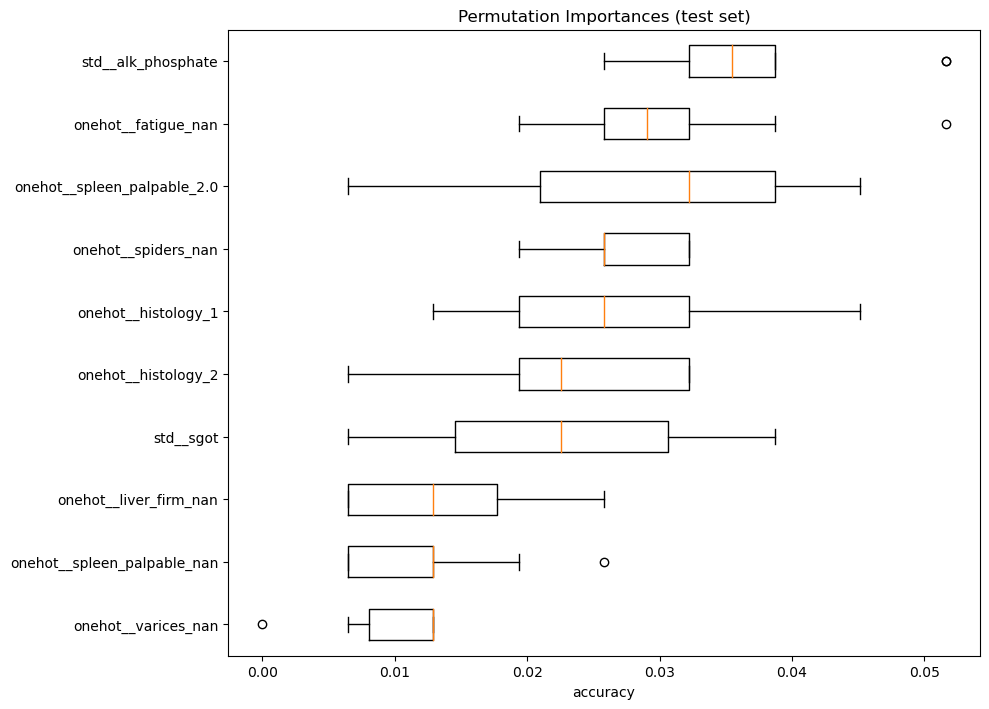

In [494]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


best_xgb_model = xgb_models[4][1]
result = permutation_importance(best_xgb_model,xgb_data[4][2] , xgb_data[4][5], n_repeats=10,random_state=42*9,scoring = 'accuracy')
sorted_idx = result.importances_mean.argsort()[-10:]
plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=df_test.columns[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.xlabel('accuracy')
plt.savefig('page13.png', dpi=300)
plt.show()

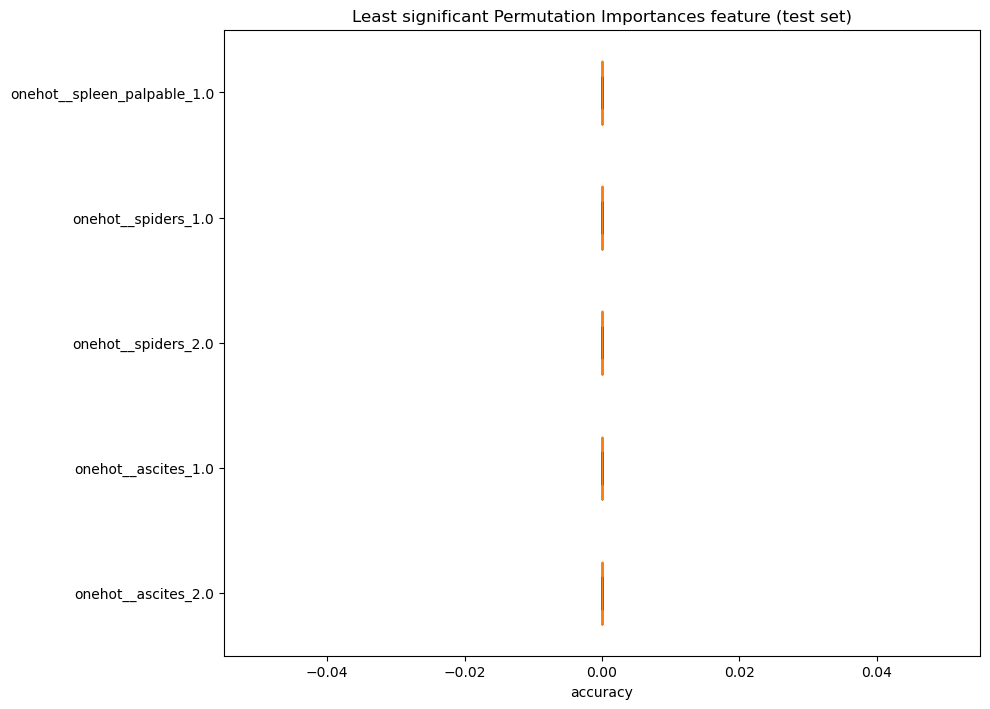

In [520]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


best_xgb_model = xgb_models[4][1]
result = permutation_importance(best_xgb_model, xgb_data[4][2] , xgb_data[4][5], n_repeats=10,random_state=42*9,scoring = 'accuracy')
sorted_idx = result.importances_mean.argsort()[5:10]
plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=df_test.columns[sorted_idx])
plt.title("Least significant Permutation Importances feature (test set)")
plt.tight_layout()
plt.xlabel('accuracy')
plt.savefig('least_important.png', dpi=350)
plt.show()

In [440]:
best_xgb_model = xgb_models[4][1].best_estimator_
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

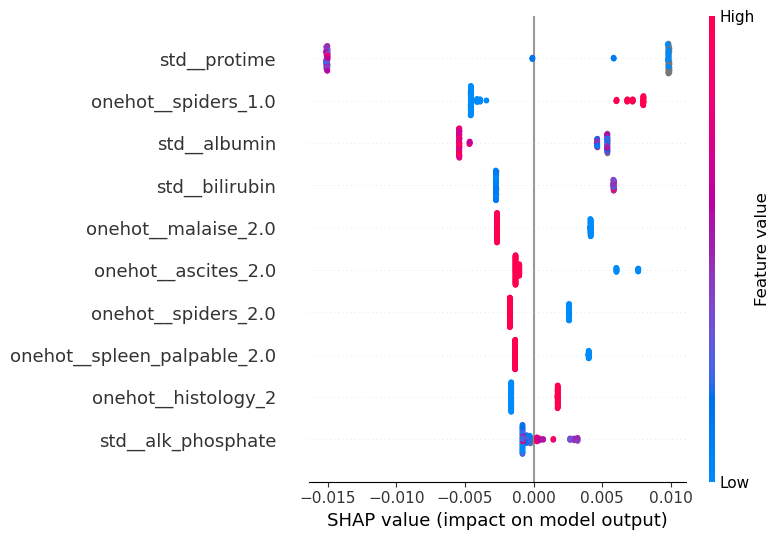

In [523]:
import shap
i = 1
explainer = shap.Explainer(best_xgb_model.best_estimator_,xgb_data[4][2],model_output="probability")

shap_values = explainer(xgb_data[4][2])
shap_sum = np.abs(shap_values.values).mean(axis=0)

top_indices = np.argsort(shap_sum)[-10:]
top_features = np.array(df_total[xgb_models[i][0]].columns)[top_indices]

# Filter the SHAP values to include only the top 10 features
shap_values_top = shap_values[:, top_features]

# Generate SHAP summary plot for the top 10 features
shap.summary_plot(shap_values_top, feature_names=top_features)

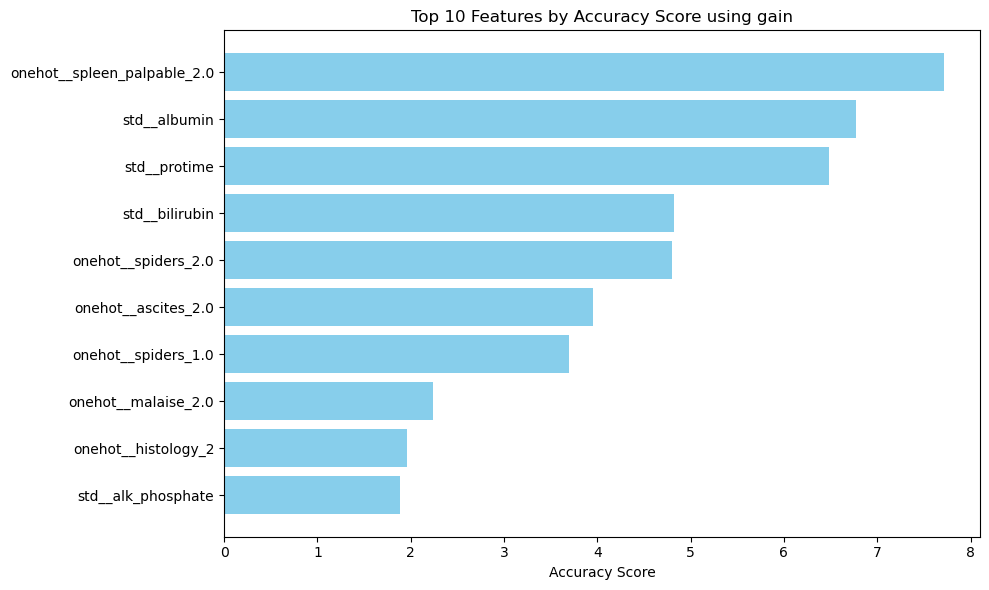

<Figure size 640x480 with 0 Axes>

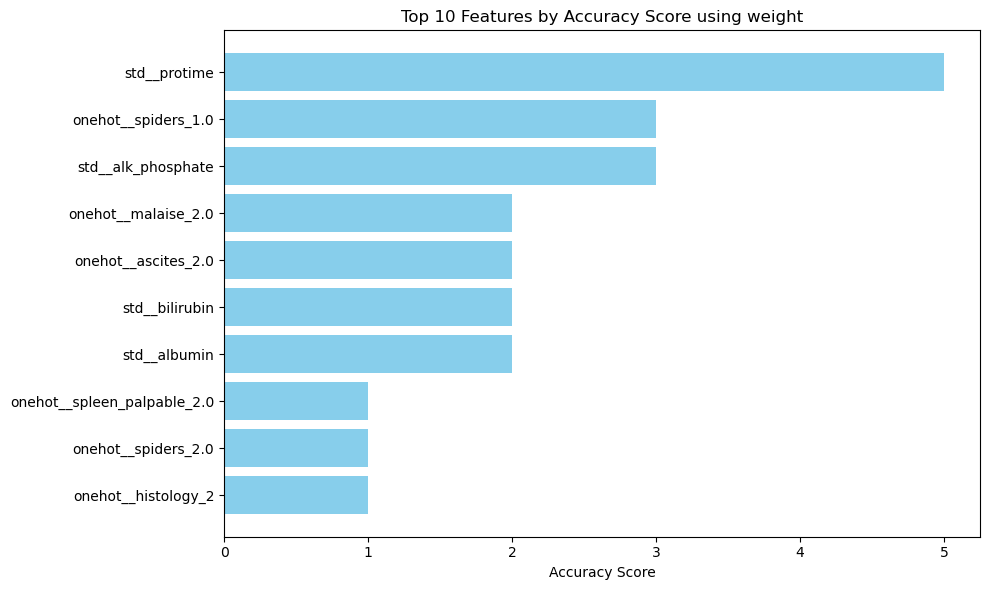

<Figure size 640x480 with 0 Axes>

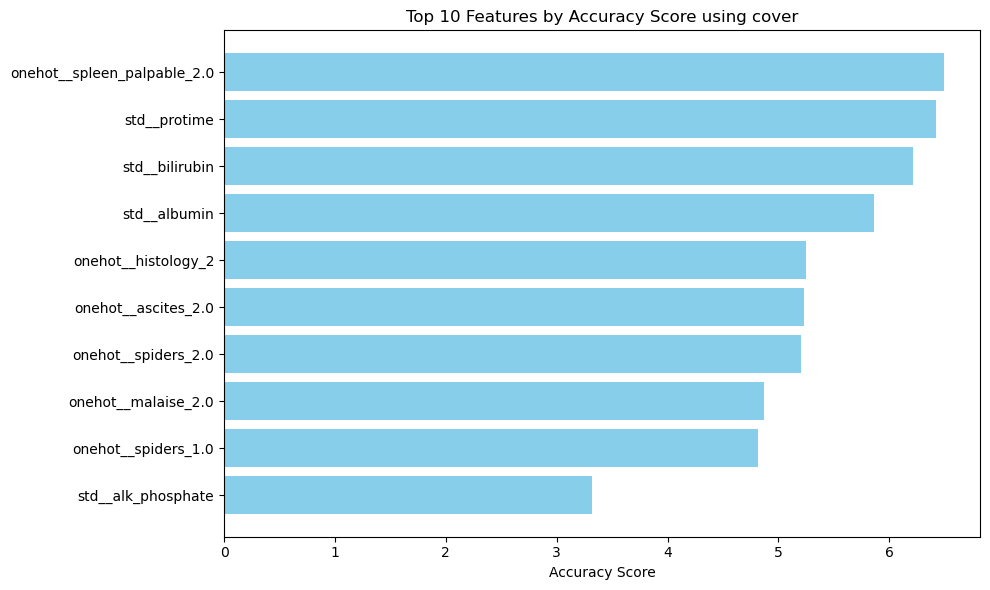

<Figure size 640x480 with 0 Axes>

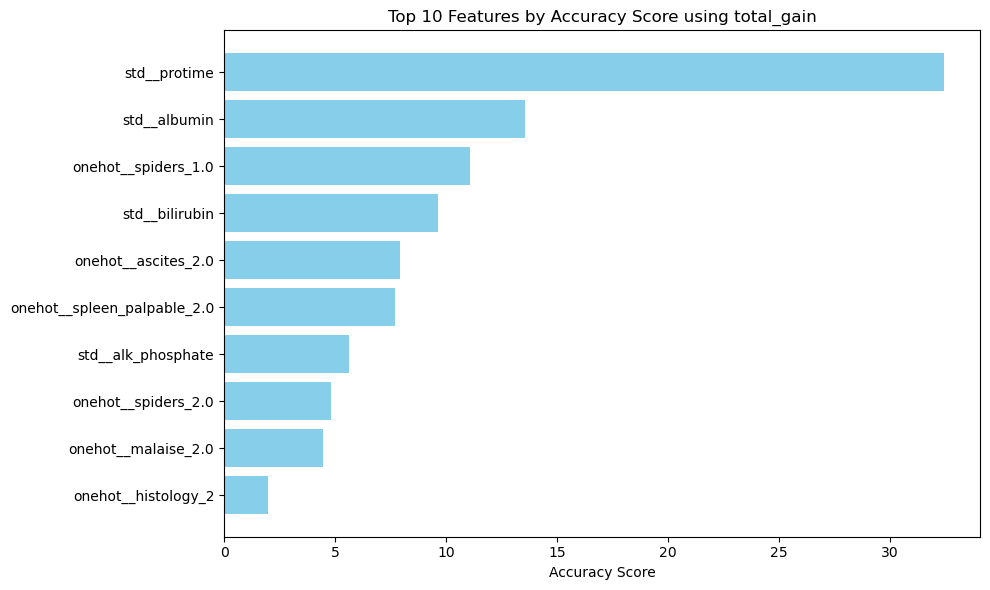

<Figure size 640x480 with 0 Axes>

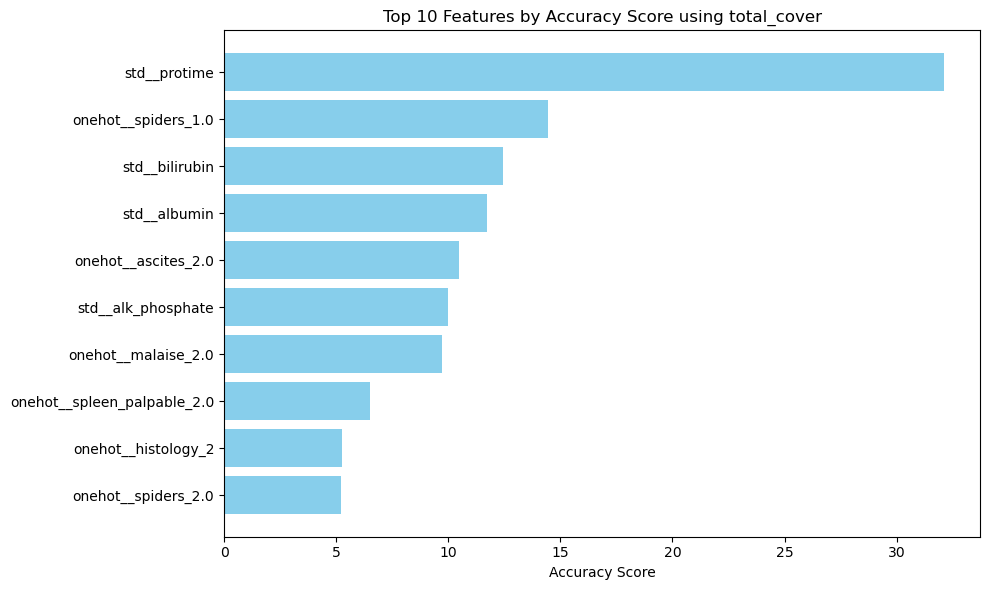

In [522]:
# Feature importance by 5 shap metrics
import matplotlib.pylab as plt

feature_importance_criteria = ["gain", "weight", "cover", "total_gain", "total_cover"]
for feature in feature_importance_criteria:
    acc_scores = best_xgb_model.best_estimator_.get_booster().get_score(importance_type=feature)

    # Handle case where acc_scores might be empty
    if not acc_scores:
        print(f"No feature importance data for '{feature}'")
        continue

    top_10 = sorted(acc_scores.items(), key=lambda x: x[1], reverse=True)[:10]
    features, scores = zip(*top_10)

    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.barh(features, scores, color='skyblue')
    plt.xlabel('Accuracy Score')
    plt.title('Top 10 Features by Accuracy Score using {}'.format(feature))
    plt.gca().invert_yaxis()  # To display the highest score at the top

    plt.tight_layout()  # Adjust the layout to fit everything
    plt.show()
    plt.clf()  # Clear the current figure for the next iteration


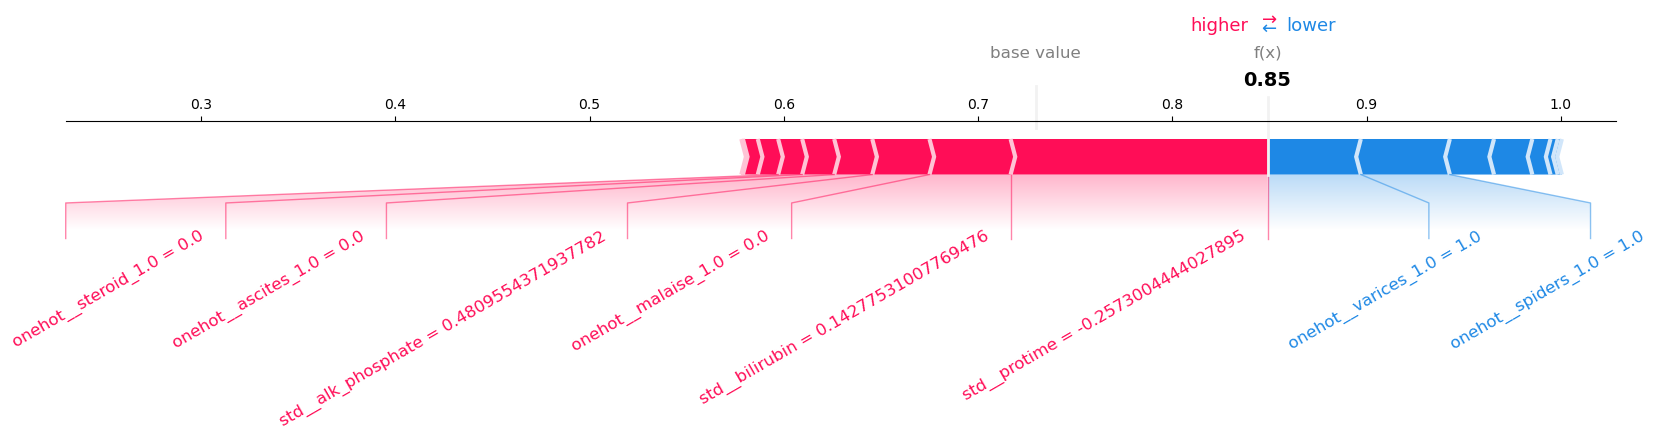

In [527]:
# force plot of a likely non-lethal hepatitis patient
shap.plots.force(shap_values[12],matplotlib=True,text_rotation=30,show = False)
plt.show()

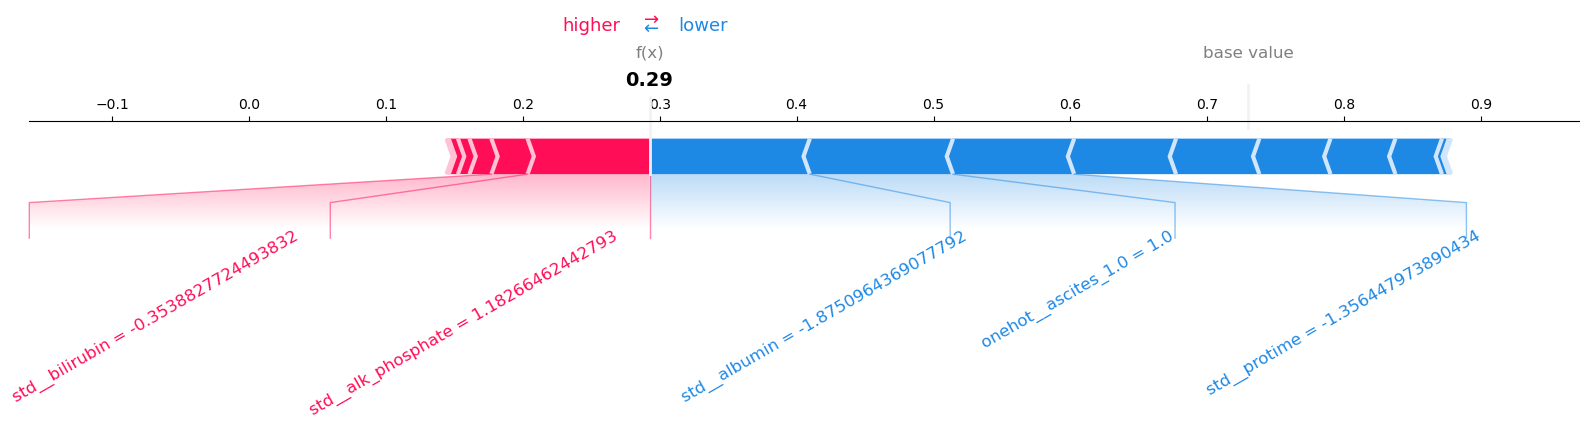

In [528]:
# force plot of a likely letha hepatitis patient 
shap.plots.force(shap_values[22],matplotlib=True,text_rotation=30,show = False)
plt.show()